In [1]:
import sys
import importlib
try:
    importlib.reload(sys.modules['experiments'])
except:
    pass
from experiments import *


In [2]:
# pd.read_feather('hist_feather/BNSO')

In [3]:
universe = prepare_universe()

In [4]:
universe[universe.date == 1984].groupby(['bm_quintile']).count()

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,symbol,mve_quintile,pscore_group,accrual
bm_quintile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
m2 = universe.copy()[['date', 'mve_quintile']]
m2['count'] = 1
caption = 'Market Value of Equity Equal-size Quintiles'
display(pd.pivot_table(m2[m2.date >= 2010], columns=['mve_quintile'],
                       index='date',
                       aggfunc="sum",
                       margins=True).rename(columns={0.:'low', 1.:'med',2.:'high'})
        .style
        .set_caption(caption)
        .set_table_styles(styles)
        .format('{:.0f}')
       )

## Statistics on the Universe of Stocks

In [6]:
m2 = universe.copy()[['date', 'bm_quintile']]
m2['count'] = 1
caption = 'Book-to-Market Equal-size Quintiles'
display(pd.pivot_table(m2[m2.date >= 2010], columns=['bm_quintile'],
                       index='date',
                       aggfunc="sum",
                       margins=True)
        .style
        .set_caption(caption)
        .set_table_styles(styles)
        .format('{:.0f}')
       )

# Table 1
# Panel A
## Statistics on High BM only stocks

In [7]:


highbm = universe[universe.bm_quintile==4]
caption = "Financial and Return Characteristics of High Book-to-Market Firms"
highbm.describe(percentiles=[0.5]).rename({'50%':'median'}).drop(columns=['date']).T[['mean', 'std', 'median']].style.set_caption(caption).set_table_styles(styles).format('{:.2f}')

,mean,std,median
totalAssets,2851670851584.00,26274730868736.00,1094310016.00
mve,15122281472.00,884710375424.00,163466696.00
commonStockIssued,110215593984.00,5220694228992.00,0.00
roa,-5889.38,798763.38,0.01
operatingCashFlow,115823165440.00,2343465648128.00,33792500.00
book,21578692608.00,785272471552.00,18.57
price,1196.84,50361.70,7.08
bm,2271648256.00,117694382080.00,2.62
d_roa,1863823.25,255347872.00,0.00
d_lever,4256589.00,919308928.00,0.00


In [8]:
# verify the data cleaning process produces no rows with undefined book value
highbm.query('book == inf')

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,symbol,bm_quintile,mve_quintile,pscore_group,accrual


# Table 1
# Panel B
## Buy and Hold Returns from a High Book-to-Market Investment Strategy

In [9]:
highbm.head()

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,symbol,bm_quintile,mve_quintile,pscore_group,accrual
0,2014,1.87e+10,6.61e+09,0.0,-1.37e-02,8.42e+08,5.81e+01,36.25,1.60e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.0,4.51e-02,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,AA,4.0,2.0,med,-0.06
1,2015,1.64e+10,4.18e+09,0.0,-4.92e-02,8.75e+08,5.18e+01,22.89,2.26e+00,-0.04,-4.60e-03,8.43e-04,-4.81e-03,-6.56e-02,0.0,5.33e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,AA,4.0,2.0,med,-0.10
0,2022,1.51e+08,3.11e+06,0.0,-2.40e-02,-9.14e+05,7.12e+00,0.15,4.74e+01,-0.02,1.67e-03,-4.32e+00,-4.39e+08,7.68e-15,0.0,-6.05e-03,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,AACIW,4.0,0.0,med,-0.02
1,2023,2.54e+07,5.34e+05,0.0,-3.63e-03,-1.86e+06,2.32e+00,0.07,3.15e+01,0.02,9.92e-02,-5.41e-02,1.82e+08,4.71e-11,0.0,-7.32e-02,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,AACIW,4.0,0.0,med,0.07
0,1997,3.59e+08,6.14e-01,0.0,2.46e-01,7.72e+07,2.27e+10,61.41,3.69e+08,0.05,-7.26e-02,4.55e+00,0.00e+00,1.86e-01,1.0,2.15e-01,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,AAIC,4.0,0.0,med,0.03


In [10]:
results = get_piotroski_experiment_results(highbm.query('date == 1990'))
len(results)

1990 plo
1990 0 cannot run experiment
1990 phi
1990 all
1990 ps_lo
1990 ps_hi


4000

In [11]:
highbm_indreturns = highbm.copy()
highbm_indreturns[return_vector_field_names] = highbm_indreturns.apply(lambda x: computeReturns(x, f'{x.date}-01-01', f'{x.date+1}-01-01'), axis=1, result_type='expand')
highbm_indreturns.head()

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,symbol,bm_quintile,mve_quintile,pscore_group,accrual,ret,p0,p10,p25,p50,p75,p90,max,mean,positive,ma_ret
0,2014,1.87e+10,6.61e+09,0.0,-1.37e-02,8.42e+08,5.81e+01,36.25,1.60e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.0,4.51e-02,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,AA,4.0,2.0,med,-0.06,0.50,-0.05,0.08,0.19,0.39,5.46e-01,6.00e-01,0.67,0.36,9.64e-01,0.38
1,2015,1.64e+10,4.18e+09,0.0,-4.92e-02,8.75e+08,5.18e+01,22.89,2.26e+00,-0.04,-4.60e-03,8.43e-04,-4.81e-03,-6.56e-02,0.0,5.33e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,AA,4.0,2.0,med,-0.10,-0.36,-0.50,-0.42,-0.40,-0.30,-1.39e-01,-7.17e-03,0.08,-0.26,8.33e-02,-0.36
0,2022,1.51e+08,3.11e+06,0.0,-2.40e-02,-9.14e+05,7.12e+00,0.15,4.74e+01,-0.02,1.67e-03,-4.32e+00,-4.39e+08,7.68e-15,0.0,-6.05e-03,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,AACIW,4.0,0.0,med,-0.02,-0.94,-0.97,-0.94,-0.77,-0.64,-4.64e-01,-3.92e-01,0.06,-0.62,3.98e-03,-0.75
1,2023,2.54e+07,5.34e+05,0.0,-3.63e-03,-1.86e+06,2.32e+00,0.07,3.15e+01,0.02,9.92e-02,-5.41e-02,1.82e+08,4.71e-11,0.0,-7.32e-02,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,AACIW,4.0,0.0,med,0.07,-0.32,-0.52,0.61,1.16,1.89,2.32e+00,2.55e+00,3.68,1.71,9.43e-01,-0.55
0,1997,3.59e+08,6.14e-01,0.0,2.46e-01,7.72e+07,2.27e+10,61.41,3.69e+08,0.05,-7.26e-02,4.55e+00,0.00e+00,1.86e-01,1.0,2.15e-01,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,AAIC,4.0,0.0,med,0.03,-0.07,-0.07,-0.06,-0.05,-0.04,-6.10e-03,-2.44e-03,0.00,-0.03,0.00e+00,-0.38


In [12]:
highbm_indreturns.head()

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,symbol,bm_quintile,mve_quintile,pscore_group,accrual,ret,p0,p10,p25,p50,p75,p90,max,mean,positive,ma_ret
0,2014,1.87e+10,6.61e+09,0.0,-1.37e-02,8.42e+08,5.81e+01,36.25,1.60e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.0,4.51e-02,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,AA,4.0,2.0,med,-0.06,0.50,-0.05,0.08,0.19,0.39,5.46e-01,6.00e-01,0.67,0.36,9.64e-01,0.38
1,2015,1.64e+10,4.18e+09,0.0,-4.92e-02,8.75e+08,5.18e+01,22.89,2.26e+00,-0.04,-4.60e-03,8.43e-04,-4.81e-03,-6.56e-02,0.0,5.33e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,AA,4.0,2.0,med,-0.10,-0.36,-0.50,-0.42,-0.40,-0.30,-1.39e-01,-7.17e-03,0.08,-0.26,8.33e-02,-0.36
0,2022,1.51e+08,3.11e+06,0.0,-2.40e-02,-9.14e+05,7.12e+00,0.15,4.74e+01,-0.02,1.67e-03,-4.32e+00,-4.39e+08,7.68e-15,0.0,-6.05e-03,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,AACIW,4.0,0.0,med,-0.02,-0.94,-0.97,-0.94,-0.77,-0.64,-4.64e-01,-3.92e-01,0.06,-0.62,3.98e-03,-0.75
1,2023,2.54e+07,5.34e+05,0.0,-3.63e-03,-1.86e+06,2.32e+00,0.07,3.15e+01,0.02,9.92e-02,-5.41e-02,1.82e+08,4.71e-11,0.0,-7.32e-02,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,AACIW,4.0,0.0,med,0.07,-0.32,-0.52,0.61,1.16,1.89,2.32e+00,2.55e+00,3.68,1.71,9.43e-01,-0.55
0,1997,3.59e+08,6.14e-01,0.0,2.46e-01,7.72e+07,2.27e+10,61.41,3.69e+08,0.05,-7.26e-02,4.55e+00,0.00e+00,1.86e-01,1.0,2.15e-01,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,AAIC,4.0,0.0,med,0.03,-0.07,-0.07,-0.06,-0.05,-0.04,-6.10e-03,-2.44e-03,0.00,-0.03,0.00e+00,-0.38


In [13]:
corr_columns = [ 'ret', 'ma_ret', 'roa', 'd_roa', 'd_margin', 'cf', 'd_liquid', 'd_lever', 'd_turn', 'accrual', 'eq_offer', 'pscore']
corr = highbm_indreturns[corr_columns].corr(method='spearman', min_periods=1, numeric_only=True)
corr

,ret,ma_ret,roa,d_roa,d_margin,cf,d_liquid,d_lever,d_turn,accrual,eq_offer,pscore
ret,1.00,0.88,0.33,2.21e-01,1.11e-01,0.22,5.05e-02,-0.13,0.11,1.09e-01,3.32e-02,0.19
ma_ret,0.88,1.00,0.31,1.88e-01,1.01e-01,0.23,3.68e-02,-0.11,0.11,9.16e-02,5.04e-02,0.21
roa,0.33,0.31,1.00,3.51e-01,9.14e-02,0.48,2.36e-02,-0.10,0.11,4.00e-01,1.06e-01,0.29
d_roa,0.22,0.19,0.35,1.00e+00,2.15e-01,0.04,6.07e-02,-0.18,0.31,2.60e-01,-3.30e-03,0.18
d_margin,0.11,0.10,0.09,2.15e-01,1.00e+00,0.04,5.81e-02,-0.08,0.09,4.49e-02,5.69e-03,0.27
cf,0.22,0.23,0.48,3.92e-02,4.17e-02,1.00,3.55e-02,-0.11,0.04,-4.28e-01,8.60e-02,0.47
d_liquid,0.05,0.04,0.02,6.07e-02,5.81e-02,0.04,1.00e+00,-0.17,-0.05,-8.49e-03,-6.11e-02,0.20
d_lever,-0.13,-0.11,-0.10,-1.84e-01,-7.79e-02,-0.11,-1.68e-01,1.00,-0.06,2.54e-02,6.57e-02,0.11
d_turn,0.11,0.11,0.11,3.05e-01,8.93e-02,0.04,-4.96e-02,-0.06,1.00,5.14e-02,1.89e-02,0.51
accrual,0.11,0.09,0.40,2.60e-01,4.49e-02,-0.43,-8.49e-03,0.03,0.05,1.00e+00,6.30e-02,-0.22


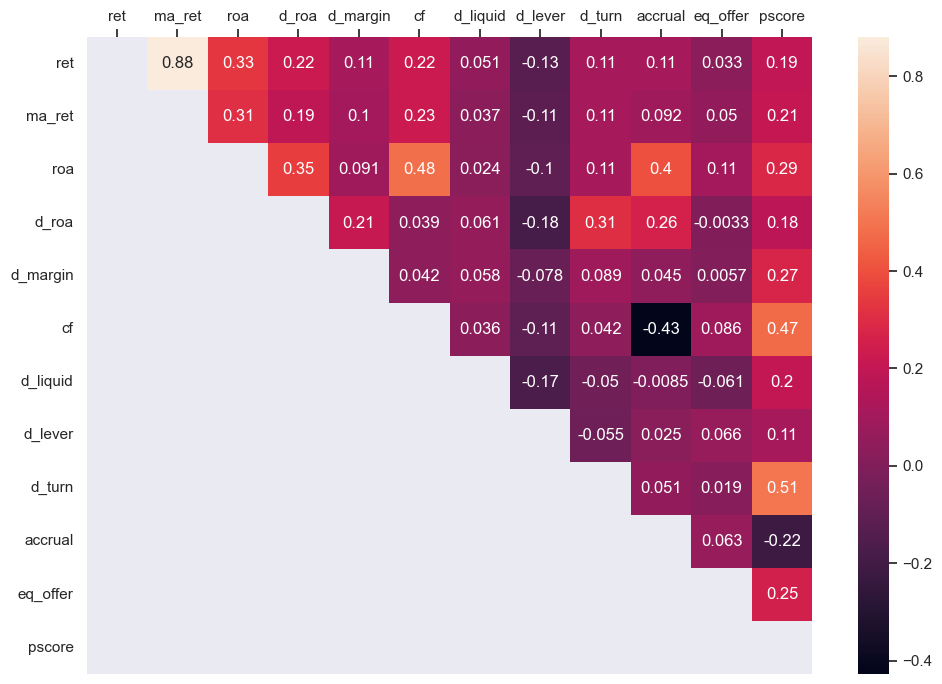

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
mask = np.tril(np.ones_like(corr))
 
# plotting a triangle correlation heatmap
ax = sns.heatmap(corr, annot=True, mask=mask)
ax.grid(False)
plt.yticks(rotation=0)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()

In [15]:
highbm_indreturns.describe()

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,bm_quintile,mve_quintile,accrual,ret,p0,p10,p25,p50,p75,p90,max,mean,positive,ma_ret
count,18386.00,1.84e+04,1.84e+04,1.84e+04,1.84e+04,1.84e+04,1.84e+04,1.84e+04,1.84e+04,1.84e+04,1.84e+04,1.84e+04,1.84e+04,1.84e+04,18386.00,1.84e+04,18386.00,18386.00,18386.00,18386.00,18386.00,18386.00,18386.00,18386.00,18386.00,18386.0,18386.00,1.84e+04,18312.00,18312.00,1.83e+04,18312.00,1.83e+04,18312.00,1.83e+04,18312.00,1.83e+04,18312.00,18312.00
mean,2011.53,2.85e+12,1.51e+10,1.10e+11,-5.89e+03,1.16e+11,2.16e+10,1.20e+03,2.27e+09,1.86e+06,4.26e+06,1.02e+11,-1.76e+10,-2.58e+06,0.67,9.19e+06,0.74,0.44,0.69,0.41,0.46,0.51,0.28,0.43,4.63,4.0,0.65,-9.20e+06,0.04,-0.27,-1.78e-01,-0.10,9.68e-03,0.13,2.47e-01,0.58,2.41e-02,0.51,-0.06
std,8.83,2.63e+13,8.85e+11,5.22e+12,7.99e+05,2.34e+12,7.85e+11,5.04e+04,1.18e+11,2.55e+08,9.19e+08,1.11e+14,1.93e+12,1.82e+08,0.47,1.25e+09,0.44,0.50,0.46,0.49,0.50,0.50,0.45,0.50,1.82,0.0,0.79,1.25e+09,1.25,0.27,5.57e-01,0.63,7.85e-01,0.98,1.46e+00,12.14,8.18e-01,0.37,1.23
min,1984.00,1.00e-02,1.60e-04,-7.78e+11,-1.08e+08,-9.54e+13,1.00e-02,1.50e-03,1.09e+00,-1.19e+10,-3.90e+10,-1.01e+16,-2.49e+14,-2.24e+10,0.00,-2.00e+07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.0,0.00,-1.69e+11,-1.30,-1.34,-1.00e+00,-1.00,-9.96e-01,-0.99,-9.95e-01,0.00,-9.91e-01,0.00,-1.38
25%,2005.00,2.64e+08,3.16e+07,0.00e+00,-1.02e-02,-2.68e+05,9.90e+00,2.94e+00,1.80e+00,-2.58e-02,-1.80e-02,-5.11e-01,-1.45e-02,-2.41e-02,0.00,-1.56e-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,4.0,0.00,-6.66e-02,-0.27,-0.44,-3.28e-01,-0.24,-1.27e-01,-0.04,9.08e-03,0.07,-1.33e-01,0.13,-0.35
50%,2014.00,1.09e+09,1.63e+08,0.00e+00,1.22e-02,3.38e+07,1.86e+01,7.08e+00,2.62e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,-2.53e-18,1.00,3.31e-02,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,5.00,4.0,0.00,-2.05e-02,0.00,-0.18,-9.98e-02,-0.05,4.91e-03,0.06,1.04e-01,0.18,6.48e-03,0.52,-0.11
75%,2019.00,9.53e+09,9.55e+08,3.02e+07,4.75e-02,3.47e+08,4.65e+01,1.38e+01,5.93e+00,1.59e-02,1.85e-02,5.33e-01,3.62e-03,1.51e-02,1.00,7.91e-02,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6.00,4.0,1.00,5.83e-03,0.19,-0.04,7.61e-04,0.04,1.10e-01,0.19,2.68e-01,0.39,1.15e-01,0.90,0.09
max,2023.00,7.01e+14,9.78e+13,5.85e+14,1.96e+04,1.90e+14,5.97e+13,3.44e+06,1.24e+13,2.95e+10,1.18e+11,1.01e+16,8.03e+12,9.69e+04,1.00,1.69e+11,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,4.0,2.00,2.00e+07,114.11,0.00,5.60e+01,59.00,7.04e+01,81.14,1.14e+02,1078.71,7.34e+01,1.00,113.87


In [16]:
results.group.unique()

array(['phi', 'all', 'ps_lo', 'ps_hi'], dtype=object)

In [17]:
caption = "Buy-and-Hold Returns from a High Book-to-Market Investment Strategy"

display(results[(results.group == "all") &
        (pd.to_datetime(results.start).dt.year < 2000)]
        .drop(columns=['start', 'end', 'group', 'max', 'mean', 'p0', 'n'])
        .mean()
        .to_frame().T);
caption = "Buy-and-Hold Returns from a High Book-to-Market Investment Strategy"
display(results[(results.group == "all")]
        .drop(columns=['start', 'end', 'group', 'mean', 'p0', 'n'])
        .mean()
        .to_frame()
        .T
        .style
        .hide(axis='index')
        .set_caption(caption)
        .set_table_styles(styles)
        .format('{:.2f}'));


,return,p10,p25,p50,p75,p90,positive,ma_ret
0,-0.2,-0.22,-0.18,-0.06,-0.03,-0.01,0.11,-0.13


return,p10,p25,p50,p75,p90,max,positive,ma_ret
-0.20,-0.22,-0.18,-0.06,-0.03,-0.01,0.03,0.11,-0.13


In [18]:
tests = run_piotroski_tests(results)

ValueError: need at least one array to concatenate

In [ ]:
display(tests[tests.start=='--']
 .style
 .hide(axis='index')
 .set_caption("Aggregate High BM Test Statistics")
 .set_table_styles(styles)
 #.format('{:.2f}')
);


In [ ]:
bull_bear(highbm)